# Instituto de Educação Superior de Brası́lia – IESB
## Pós-Graduação em Inteligência Artificial
### Deep Learning e Redes Neurais

### Atividade 3 - Remoção de Ruído de Imagens com Autoencoder Convolucional - Dataset EMNIST


## 1) Carregue o Dataset

 * Os datasets fornecidos estão salvos em formato binário Big Endian, que seguem a seguinte lógica:
 <br>
 <br>
 
  __Arquivo de Imagens__:
 
    | Tamanho <br>(Bytes)    |   Elemento      | Descrição              |
    |:---------------------: | :-------------: | :--------------------: |
    | 4                      | MAGIC NUMBER    | ($2051_{10}$)          |
    | 4                      | COUNT           | Quantidade de imagens  |
    | 4                      | HEIGHT          | Altura da imagem       |
    | 4                      | WIDTH           | Largura da imagem      | 
    | HEIGHT$\times$WIDTH    | IMG_1           | 1ª imagem              |
    | HEIGHT$\times$WIDTH    | IMG_2           | 2ª imagem              |
    | $\vdots$               | $\vdots$        | $\vdots$               |
    | HEIGHT$\times$WIDTH    | IMG_COUNT       | Última imagem          |
    |========================|=================|========================|

<br>
  
 - Carregue as bases de treino e de teste (X_train, X_test).

In [1]:
import numpy as np
import random
import tensorflow as tf

In [2]:
def bloco():
    
    import struct

    def mnist_read_images(fname:str):
        with open(fname,'rb') as f:                                
            (magic, images, height, width) = struct.unpack( ">4i", f.read(16) )                                    
            print( f'file: {fname}; Magic: {magic}; count: {images}; height: {height}; width: {width}' )
            result = []
            for i in range(images):
                img = []
                for y in range(height):
                    img.append( [b for b in struct.unpack( f">{width}B", f.read(width) ) ] ) 
                result.append( img )
           
        return np.array( result )

    global X_train, X_test
    X_train = mnist_read_images( 'data/train-images' )
    X_test = mnist_read_images( 'data/test-images' )
  
    print()
    print(f' >> X_train shape: {X_train.shape}; range: [{X_train.min()}, {X_train.max()}]' )
    print(f' >> X_test  shape: {X_test.shape}; range: [{X_test.min()}, {X_test.max()}]')
    print()

bloco()

file: data/train-images; Magic: 2051; count: 60000; height: 28; width: 28
file: data/test-images; Magic: 2051; count: 10000; height: 28; width: 28

 >> X_train shape: (60000, 28, 28); range: [0, 255]
 >> X_test  shape: (10000, 28, 28); range: [0, 255]



## 2) Verifique o formato dos conjuntos carregados

 - Imprima shape, tipo do dado e range (min/max) dos datasets

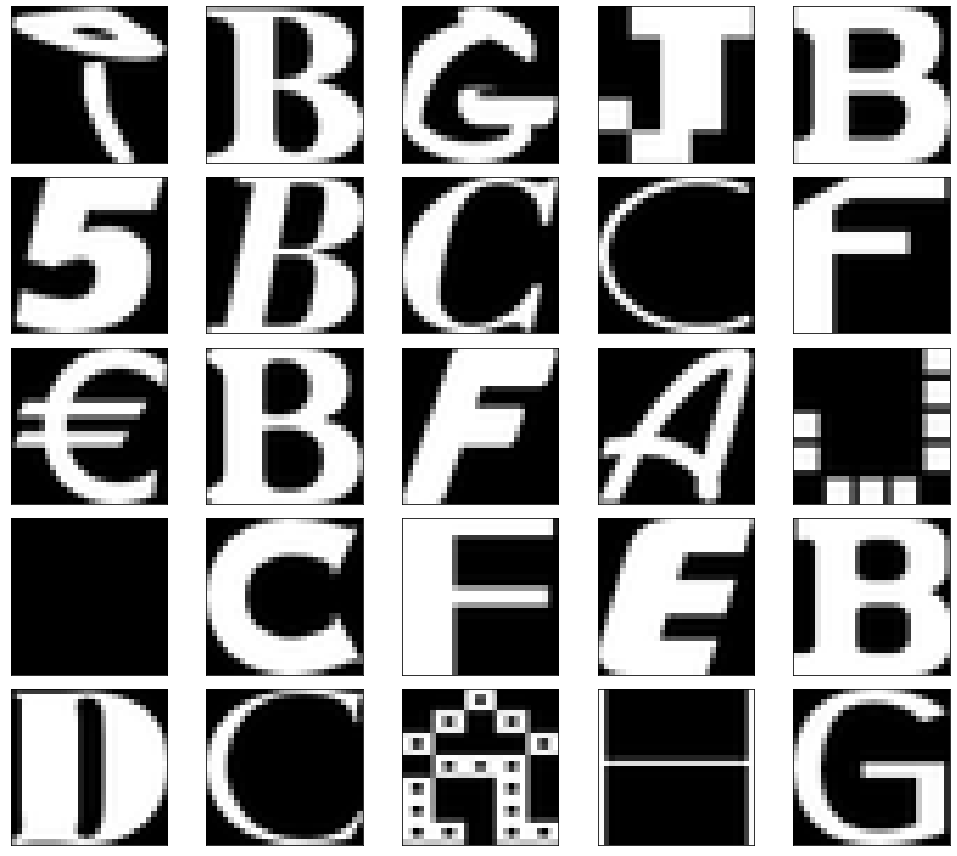

In [3]:

def bloco():
    
    import matplotlib.pyplot as plt
    import random

    plt.figure(figsize=(14,12))
    for digit_num in range(0,25):
        digit_num2 = random.randint(0,len(X_train))
        plt.subplot(5,5,digit_num+1)
        grid_data = X_train[digit_num2].reshape(28,28)  # reshape from 1d to 2d pixel array
        plt.imshow(grid_data, interpolation = "none", cmap = "gray")
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

bloco()

## 3) Adeque, se necessário: tipo, shape e range dos dados para o formato esperado pelo Autoecoder

In [4]:
def bloco():

    global X_train, X_test

    X_train = X_train / 255
    X_test  = X_test  / 255

    X_train = np.expand_dims(X_train, axis=3)
    X_test  = np.expand_dims(X_test, axis=3)

    # Verificando formato (shape), e distribuição (range) dos dados
    print()
    print(f' >> X_train shape: {X_train.shape}; range: [{X_train.min()}, {X_train.max()}]' )
    print(f' >> X_test  shape: {X_test.shape}; range: [{X_test.min()}, {X_test.max()}]')
    print()

bloco()


 >> X_train shape: (60000, 28, 28, 1); range: [0.0, 1.0]
 >> X_test  shape: (10000, 28, 28, 1); range: [0.0, 1.0]



## 4) Crie cópias dos datasets de treino e de teste, e contamine-as com ruído gaussiano

Utilizar para o ruído:

    - Média = 0
    - Desvio Padrão = 1
    - Fator multiplicativo de ruído = 0.5
    
Clipe as imagens contaminadas em valores entre 0 e 1 .

OBS: Crie versões de ruído distintas para cada base! 

In [5]:
def bloco():

   global X_train_noisy
   global X_test_noisy

   X_train_noisy = np.copy( X_train )
   X_test_noisy = np.copy( X_test )
 

   # Escala de meio não é a mesma coisa que definir desvio padrão = 0.5 no lugar de 1.0? 
   # Me permiti aumentar um pouco o ruido

   def adiciona_ruido(d):
      for i in range(len(d)):
         noise = np.random.normal( loc=0, scale=0.7, size=(28,28,1) )
         noise = np.clip(noise,0,1.0)         
         d[i] = d[i]/2 + noise/2
         np.clip( d[i], 0, 1.0 )
      
   adiciona_ruido( X_train_noisy )
   adiciona_ruido( X_test_noisy )
  
bloco()

## 5)  Verifique o resultado da contaminação de ruído nas imagens
 - Escolha __10__ imagens, de forma aleatória, de cada base (treino e teste), e plote as versões originais e com ruído de cada uma

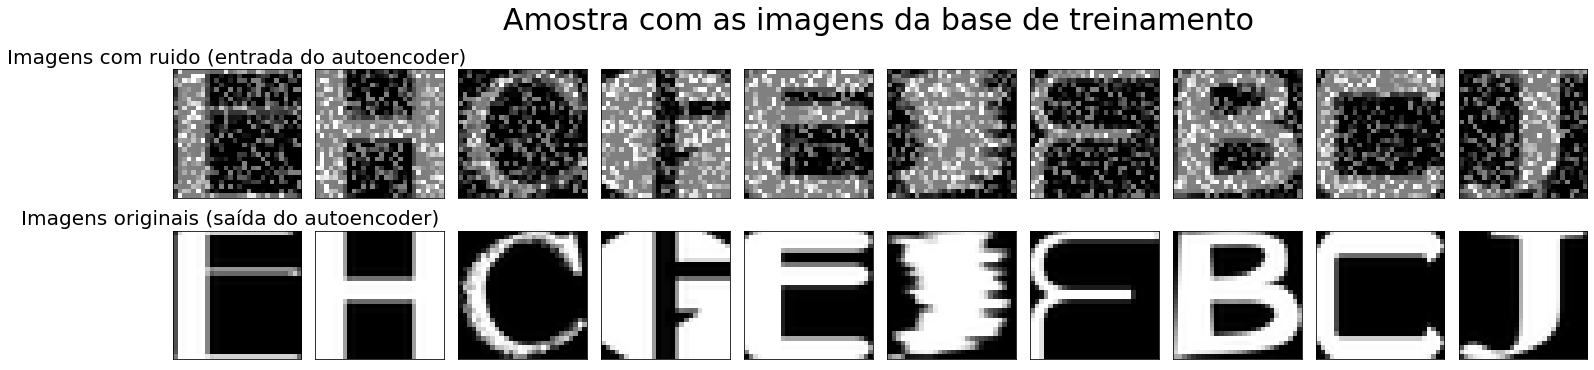

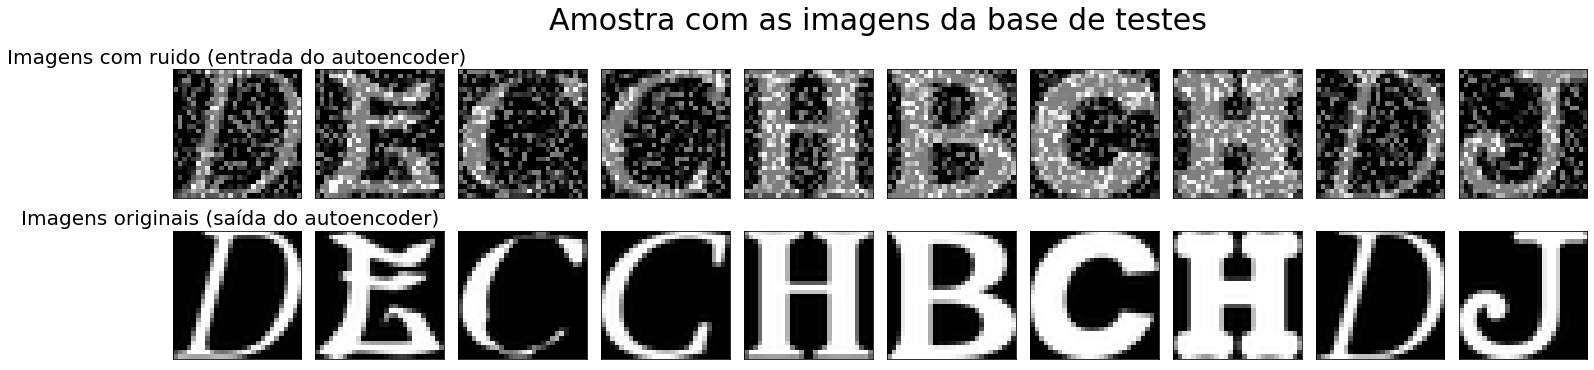

In [6]:
def bloco(title,X,X_noisy):
   
   import matplotlib.pyplot as plt
   import random
  
   w = 10 
   h = 2
   fig, ax = plt.subplots(h,w,figsize=(w*2,h*2+1.4))
   plt.suptitle( title, size=30 )
   
   for x in range(w):
      ax_noisy = ax[0][x]
      ax_clear = ax[1][x]

      idx = random.randint(0,len(X_noisy)-1)

      ax_noisy.imshow( X_noisy[ idx ].reshape(28,28), interpolation = "none", cmap = "gray" )
      ax_noisy.set_xticks([])
      ax_noisy.set_yticks([])

      ax_clear.imshow( X[ idx ].reshape(28,28), interpolation = "none", cmap = "gray" )
      ax_clear.set_xticks([])
      ax_clear.set_yticks([])

      if x == 0:
         ax_noisy.set_title( 'Imagens com ruido (entrada do autoencoder)', size=20 )
         ax_clear.set_title( 'Imagens originais (saída do autoencoder)  ', size=20 )
  
   plt.tight_layout()

bloco('Amostra com as imagens da base de treinamento',X_train,X_train_noisy)
bloco('Amostra com as imagens da base de testes',X_test,X_test_noisy)

## 6) Construa o modelo de autoencoder convolucional

In [7]:
def create_conv_autoencoder(input_shape, code_len):
    
    # Criando Encoder
    enc_in = tf.keras.layers.Input(shape=input_shape, name='enc_in')
    
    x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(enc_in)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
    pre_flatten_shape = x.shape[1:]

    x = tf.keras.layers.Flatten()(x)
    latent = tf.keras.layers.Dense(units=code_len, activation='relu')(x)
    
    encoder = tf.keras.Model(
        inputs=enc_in,
        outputs=latent,
        name='encoder'
    )
    
    # Criando Decoder
    dec_in = tf.keras.layers.Input(shape=(code_len,), name='dec_in')
    
    x = tf.keras.layers.Dense(units=np.prod(pre_flatten_shape), activation='relu')(dec_in)
    x = tf.keras.layers.Reshape(pre_flatten_shape)(x)

    x = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)
  
    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(x)

    x = tf.keras.layers.UpSampling2D((2, 2))(x)
    x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
  
    dec_out = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(x)

    decoder = tf.keras.Model(
       inputs=dec_in,
       outputs=dec_out,
       name='decoder',
    )
    
    # Criando AutoEncdoer Completo
    autoencoder = tf.keras.Model(
       inputs=enc_in,
       outputs=decoder(encoder(enc_in)),
       name='conv_ae',
    )
    
    return autoencoder, encoder, decoder



## 7) Defina os parâmetros para o treinamento do modelo *autoencoder*

In [8]:
def bloco():

    global autoencoder, encoder, decoder

    # Insira seu código aqui
    tf.keras.backend.clear_session()

    autoencoder, encoder, decoder = create_conv_autoencoder(input_shape=(28, 28, 1), code_len=36)
    autoencoder.summary()
    encoder.summary()


    # Utilizaremos o otimizador Adam, com um 'learning_rate' inicial de 0.001.
    # Abaixo, vamos implementar um callback que reduz esse 'learning_rate',
    # caso o modelo atinja um platô durante o treinamento.
    # Experimente outros otimizadores.
    opt = tf.keras.optimizers.Adam(learning_rate=1e-3)

    autoencoder.compile(
        loss='mean_squared_error',
        optimizer=opt,
    )

bloco()

Model: "conv_ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
enc_in (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 36)                16052     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         16985     
Total params: 33,037
Trainable params: 33,037
Non-trainable params: 0
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
enc_in (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
______________________________________

2021-11-02 08:46:35.117855: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-02 08:46:35.564546: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-02 08:46:35.566134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-02 08:46:35.569404: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## 8) Treine o modelo

In [9]:
def bloco():
    
    global hist

    MAX_EPOCHS = 500
    BATCH_SIZE = 256

    # Callback 1: Early Stopping
    #   Esse callback irá interromper o treino
    #   caso o modelo pare de melhorar a métrica 'val_loss',
    #   dada uma tolerância de 1e-6,
    #   por 10% do máximo de épocas de treino.
    es = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=int(0.1*MAX_EPOCHS),
        min_delta=1e-4,
        restore_best_weights=True,
        verbose=True,
    )

    # Callback 2: ReduceLROnPlateau
    #   Caso o modelo pare de melhorar a métrica 'val_loss',
    #   por 10 épocas de treino ('patience'),
    #   esse callback irá ser ativado, e
    #   reduzirá o 'learning_rate' por um fator de 0.75 ('factor'),
    #   até o limite de 1e-5 ('min_lr').
    red_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        patience=10,
        factor=0.75,
        min_lr=1e-5,
        verbose=True,
    )

    # Ajuste do modelo
    hist = autoencoder.fit(
        x=X_train_noisy, y=X_train,
        batch_size=BATCH_SIZE,
        epochs=MAX_EPOCHS,
        validation_data=(X_test_noisy, X_test),
        callbacks=[es, red_lr],
        workers=os.cpu_count(),
    )

bloco()

2021-11-02 08:46:43.481326: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500


2021-11-02 08:46:49.497791: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8202


235/235 [==============================] - 28s 49ms/step - loss: 0.1100 - val_loss: 0.0628
Epoch 2/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0593 - val_loss: 0.0500
Epoch 3/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0504 - val_loss: 0.0433
Epoch 4/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0457 - val_loss: 0.0398
Epoch 5/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0429 - val_loss: 0.0368
Epoch 6/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0408 - val_loss: 0.0354
Epoch 7/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0393 - val_loss: 0.0341
Epoch 8/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0381 - val_loss: 0.0331
Epoch 9/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0372 - val_loss: 0.0326
Epoch 10/500
235/235 [==============================] - 11s 45ms/step - loss: 0.0365 

## 9) Plote as curvas da função custo do conjunto de treino e de validação

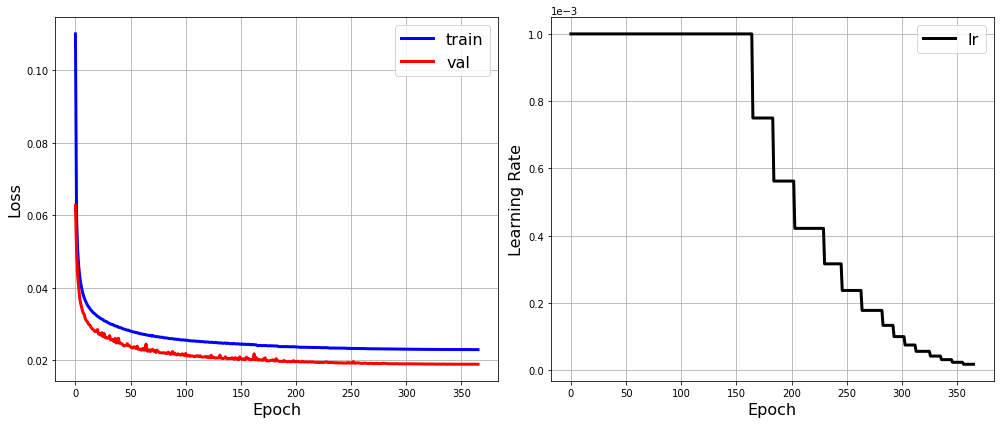

In [15]:
def bloco():

    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 6))

    plt.subplot(121)
    plt.plot(hist.history['loss'], label='train', c='b', linewidth=3)
    plt.plot(hist.history['val_loss'], label='val', c='r', linewidth=3)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(fontsize=16)
    plt.grid(True)

    plt.subplot(122)
    plt.plot(hist.history['lr'], label='lr', c='k', linewidth=3)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Learning Rate', fontsize=16)
    plt.legend(fontsize=16)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
    plt.grid(True)

    plt.tight_layout()
    plt.show()

bloco()

## 10) Escolha __10__ exemplos aleatórios de imagens da base de teste (com ruído), e reconstrua-as com o *autoecoder* treinado. Mostre graficamente, para essas 10 imagens:

 * Imagem original (sem ruído)
 * Imagem de entrada (com ruído)
 * Vetor Latente
 * Imagem Reconstruída


In [16]:
X_test_latent = encoder.predict( X_test )
X_test_reconstructed = decoder.predict( X_test_latent )

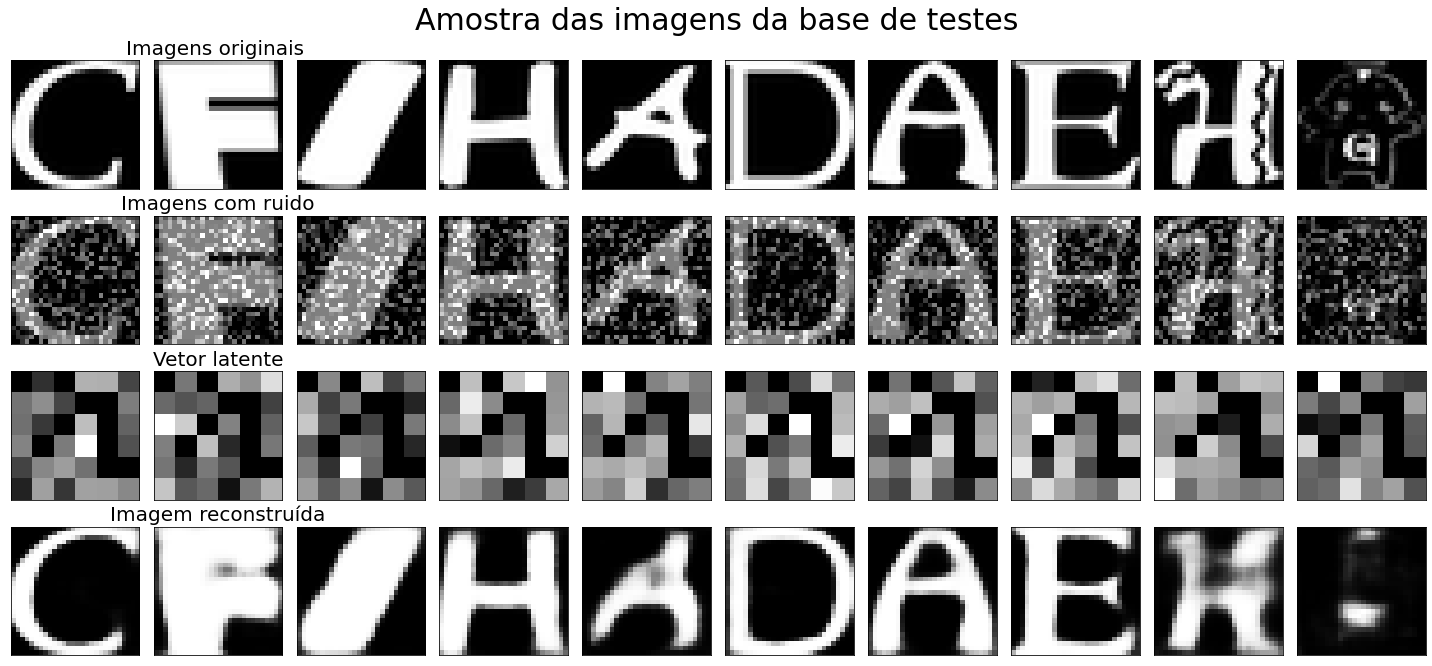

In [17]:

def bloco(title,X,X_noisy,X_latent,X_reconstructed):
   
   import matplotlib.pyplot as plt
   import random
  
   w = 10 
   h = 4
   fig, ax = plt.subplots(h,w,figsize=(w*2,h*2+1.4))
   plt.suptitle( title, size=30 )
   
   for x in range(w):
      ax_noisy = ax[1][x]
      ax_clear = ax[0][x]
      ax_latente = ax[2][x]
      ax_reconstruida = ax[3][x]

      idx = random.randint(0,len(X_noisy)-1)

      ax_noisy.imshow( X_noisy[ idx ].reshape(28,28), interpolation = "none", cmap = "gray" )
      ax_noisy.set_xticks([])
      ax_noisy.set_yticks([])

      ax_clear.imshow( X[ idx ].reshape(28,28), interpolation = "none", cmap = "gray" )
      ax_clear.set_xticks([])
      ax_clear.set_yticks([])

      ax_latente.imshow( X_latent[ idx ].reshape(6,6), interpolation = "none", cmap = "gray" )
      ax_latente.set_xticks([])
      ax_latente.set_yticks([])

      ax_reconstruida.imshow( X_reconstructed[ idx ].reshape(28,28), interpolation = "none", cmap = "gray" )
      ax_reconstruida.set_xticks([])
      ax_reconstruida.set_yticks([])

      if x == 1:
         ax_noisy.set_title( 'Imagens com ruido', size=20 )
         ax_clear.set_title( 'Imagens originais ', size=20 )
         ax_latente.set_title( 'Vetor latente', size=20 )
         ax_reconstruida.set_title('Imagem reconstruída', size=20 )
  
   plt.tight_layout()

bloco('Amostra das imagens da base de testes', X_test, X_test_noisy, X_test_latent, X_test_reconstructed)

## 11) Avaliação quantitiva utilizando SNR

- A SNR é uma métrica comumente utilizada para avaliar reconstrução de imagens. 
- Quando maior esse valor, melhor a qualidade da reconstruição.
- É definida, em decibéis (dB), como:

$
\text{SNR}_{\text{dB}} = 20 \cdot \log{\left( \frac{\sum\text{I}_\text{orig}}{\sum\left| \text{I}_\text{orig} - \text{I}_\text{reconst} \right| } \right)}
$

 - Calcule a SNR para cada imagem reconstruida na base de teste, e guarde esses valores em um vetor.

 - Em seguida, apresente em um historgrama a distribuição das SNRs calculadas.

In [18]:
def snr_db(im_original, im_reconstructed):
    """
    Calcula a SNR, em dB, de uma reconstrução.
    
    Parâmetros:
        im_original : Numpy.Array
            Matriz da imagem original, com shape (H, W, C)

        im_reconstructed : Numpy.Array
            Matriz da imagem reconstruída, com shape (H, W, C)
            
    Retorno:
        snr : float
            SNR calculada em dB.
    """
    import numpy as np
    orig_sum = np.sum(im_original)
    error_sum = np.sum(np.abs(im_original - im_reconstructed))
    snr = 20 * np.log10(orig_sum/error_sum)
    return snr

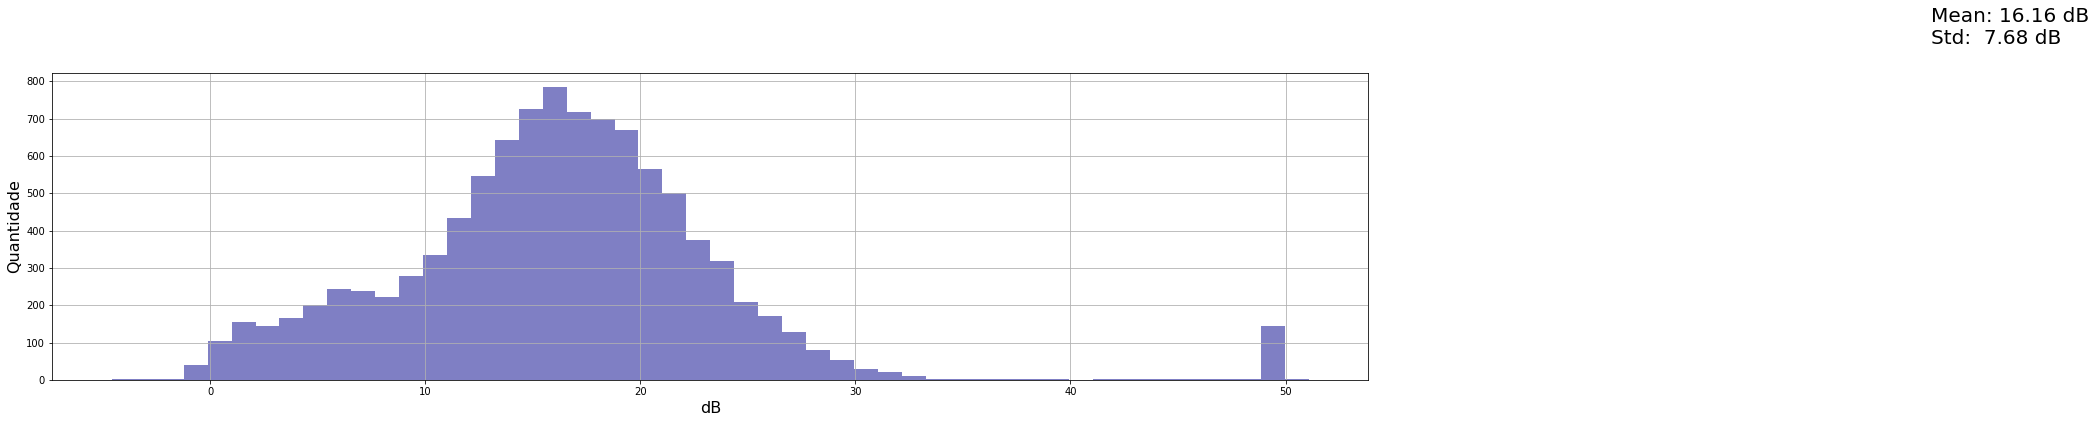

In [19]:
def bloco():

    import matplotlib.pyplot as plt
    import random

    snr_decoded = [snr_db(original, reconstructed) for original, reconstructed in zip(X_test, X_test_reconstructed)]

    snr_mean = np.mean(snr_decoded)
    snr_std  = np.std(snr_decoded)

    plt.figure(figsize=(32, 6))

    plt.hist(snr_decoded, bins=50, color='darkblue', alpha=0.5)
    plt.text(x=80, y=900, s=f'Mean: {snr_mean:.2f} dB\nStd:  {snr_std:.2f} dB', fontsize=20)
    plt.ylabel('Quantidade', fontsize=16)
    plt.xlabel('dB', fontsize=16)

    plt.grid(True)

    plt.tight_layout()
    plt.show()

bloco()